# Load the raw data
This dataset is compiled by Johns Hopkins University and updated daily
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

Here I forked their repository and use this app (https://github.com/apps/pull) to keep the forked repo updated.

In this notebook, I look at the global data only. For US data, see EDA_US.

In [196]:
import pandas as pd 
import os
import numpy as np
import plotly.graph_objects as go
import plotly
import plotly.express as px
import plotly.io as pio
from IPython.display import Image

# Load data
print('Beginning data loading ...')

# Data directory
dir_parent = os.path.dirname(os.getcwd())
dir_data = os.path.join(dir_parent, 'COVID-19/csse_covid_19_data/csse_covid_19_time_series')

# Global case 
dir_global = os.path.join(dir_data, 'time_series_covid19_confirmed_global.csv')
global_case = pd.read_csv(dir_global)

# Global death
dir_global_death = os.path.join(dir_data, 'time_series_covid19_deaths_global.csv')
global_death = pd.read_csv(dir_global_death)
    
print('Data loading finished!')

Beginning data loading ...
Data loading finished!


# Explore and analyze confirmed cases

## Explore the data structure and basic information

In [197]:
# Let's look at a few rows
global_case.head(n=2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,766,773,782,789,795,803,820,832,842,850


In [198]:
# Rename feature Country/Region to Country to avoid headache later
global_case.rename(columns={'Country/Region': 'Country'}, inplace=True)
global_case.head(n=2)

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,766,773,782,789,795,803,820,832,842,850


In [199]:
# Basic information
unique_country_name = list(global_case['Country'].unique())
n_country = len(unique_country_name)
column_name = list(global_case.keys())
date_string = column_name[4:]
n_day = len(date_string)
print("Number of countries: " + str(n_country))
print("Number of recorded days: " + str(n_day))

Number of countries: 187
Number of recorded days: 108


In [200]:
# Collapse across countries 
global_case_collapse_country = global_case.groupby('Country').sum().reset_index()
global_case_collapse_country.head(n=2)

,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,766,773,782,789,795,803,820,832,842,850


## Look at top-15 countries with the most number of cases

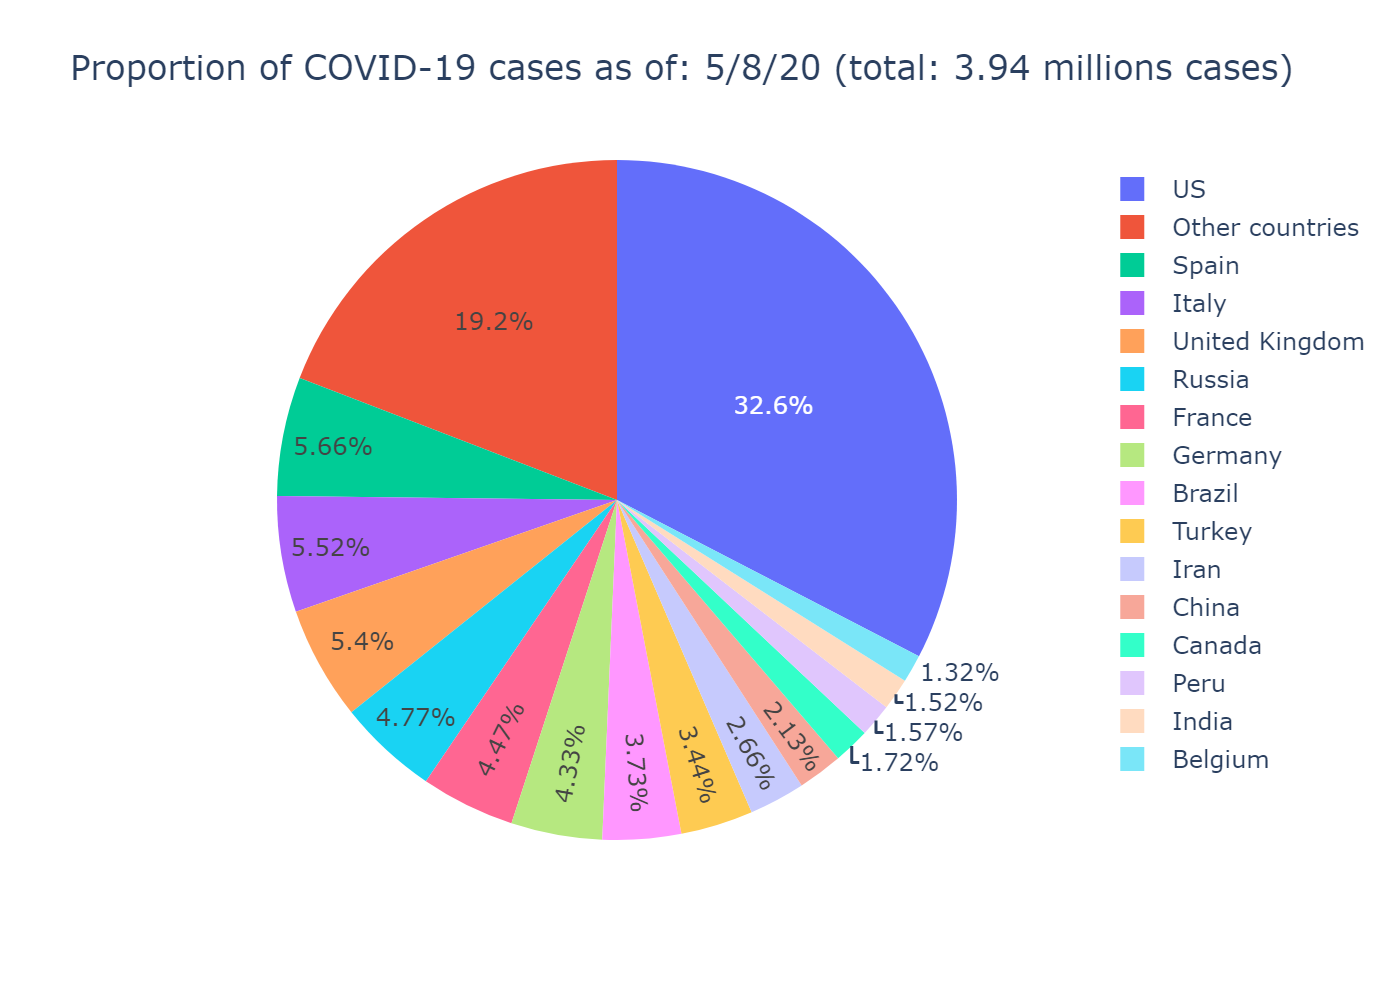

In [284]:
# Select top-15 countries and aggregate all other countries
total_case = round(global_case_collapse_country[date_string[-1]].sum() / 1000000, 2)
top_country = global_case_collapse_country.nlargest(15, date_string[-1])
country_collapse_bottom = global_case_collapse_country.copy()
country_collapse_bottom.loc[country_collapse_bottom[date_string[-1]] < top_country[date_string[-1]].min(),
                            'Country'] = 'Other countries'


# Pie chart
fig = px.pie(country_collapse_bottom, values=date_string[-1], names='Country',
             title='Proportion of COVID-19 cases as of: ' + date_string[-1] + " (total: " + str(total_case) + " millions cases)")

margin_size = 80
fig.update_layout(margin=dict(l=margin_size, r=margin_size, t=margin_size, b=margin_size))

# Interactive plot
# fig.show()

# Static plot (to show the figures on Github, I have to convert to static image)
# For interactive plot, use the interactive plot above
Image(pio.to_image(fig, format='png', scale=2))

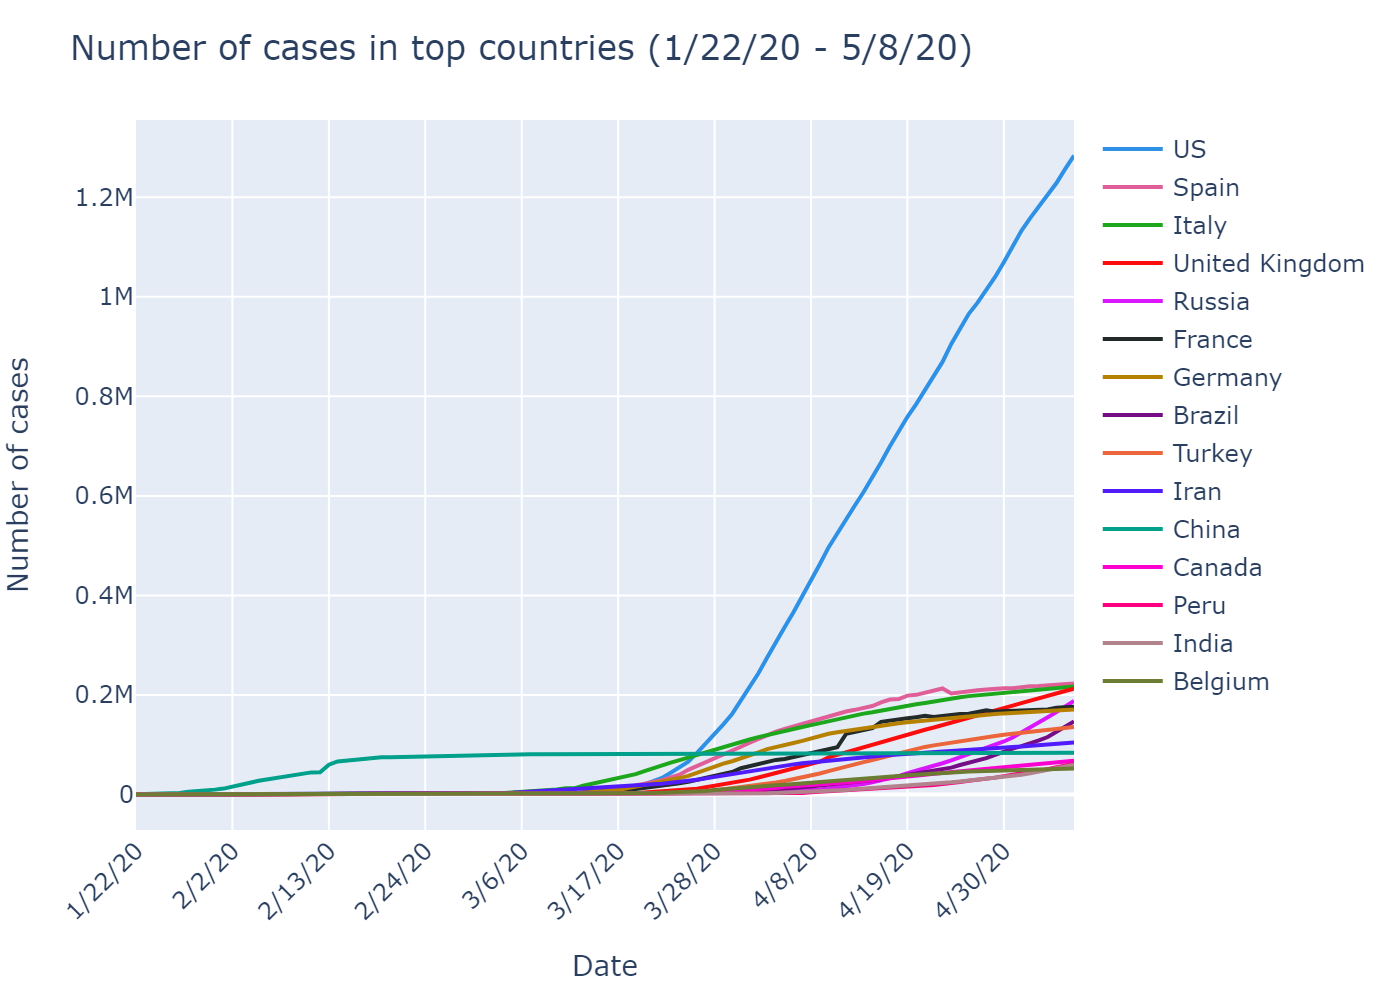

In [202]:
# Now let's look at the number of case across time for top countries
name_top_country = top_country['Country']
matrix_num_case = top_country.drop(columns=['Country', 'Lat', 'Long']).to_numpy()

# Plot the number of cases
fig = go.Figure()
color_values = plotly.colors.qualitative.Dark24
for index, country in enumerate(name_top_country):
    fig.add_trace(go.Scatter(x=date_string, y=matrix_num_case[index, :], name=country,
                             line=dict(color=color_values[index])))
    
margin_size = 60
fig.update_layout(title='Number of cases in top countries (' + date_string[0] + ' - ' + date_string[-1] + ')',
                   xaxis_title='Date',
                   yaxis_title='Number of cases',
                 margin=dict(l=margin_size, r=margin_size, t=margin_size, b=margin_size), height=500)
fig.update_xaxes(tickangle=-45, nticks=10)

# Interactive plot
# fig.show()

# Static plot (for view on Github)
Image(pio.to_image(fig, format='png', scale=2))

## Look at bottom-15 countries with the least number of cases

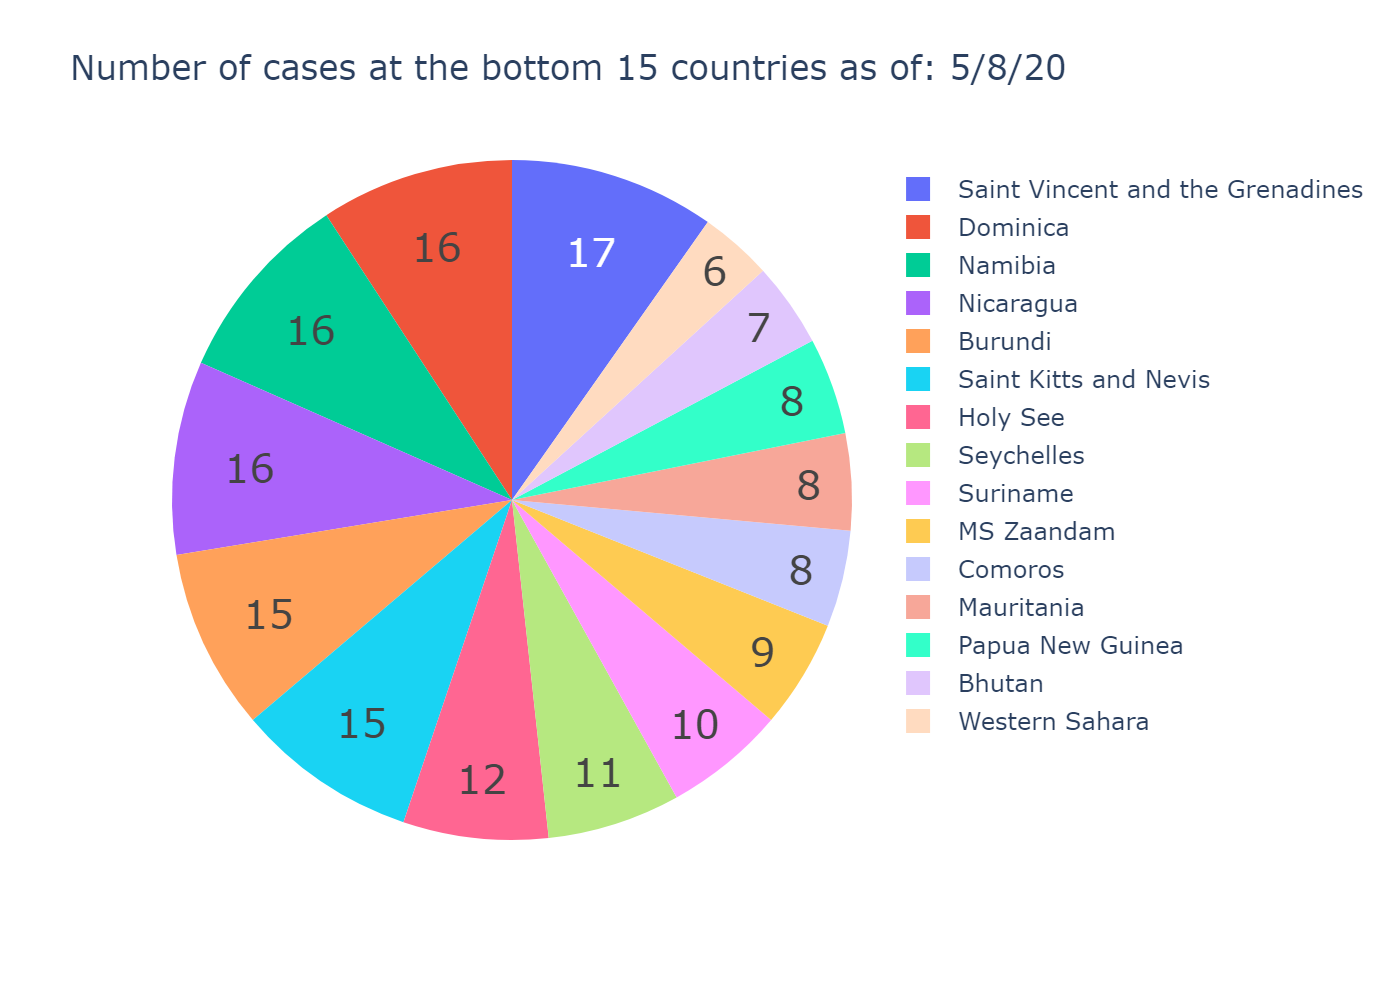

In [293]:
# Display the countries with the least number of cases
bottom_country = global_case_collapse_country.nsmallest(15, column_name[-1])
# fig = px.pie(bottom_country, values=column_name[-1], names='Country',
#              title='Proportion of COVID-19 cases at the bottom 15 countries as of: ' + column_name[-1])

fig = go.Figure(data=[go.Pie(labels=bottom_country['Country'],
                             values=bottom_country[column_name[-1]])])

margin_size = 80
fig.update_traces(hoverinfo='label+value', textinfo='value', textfont_size=20)
fig.update_layout(margin=dict(l=margin_size, r=margin_size, t=margin_size, b=margin_size),
                 title_text='Number of cases at the bottom 15 countries as of: ' + column_name[-1])

# Interactive plot
# fig.show()

# Static plot (for view on Github)
Image(pio.to_image(fig, format='png', scale=2))

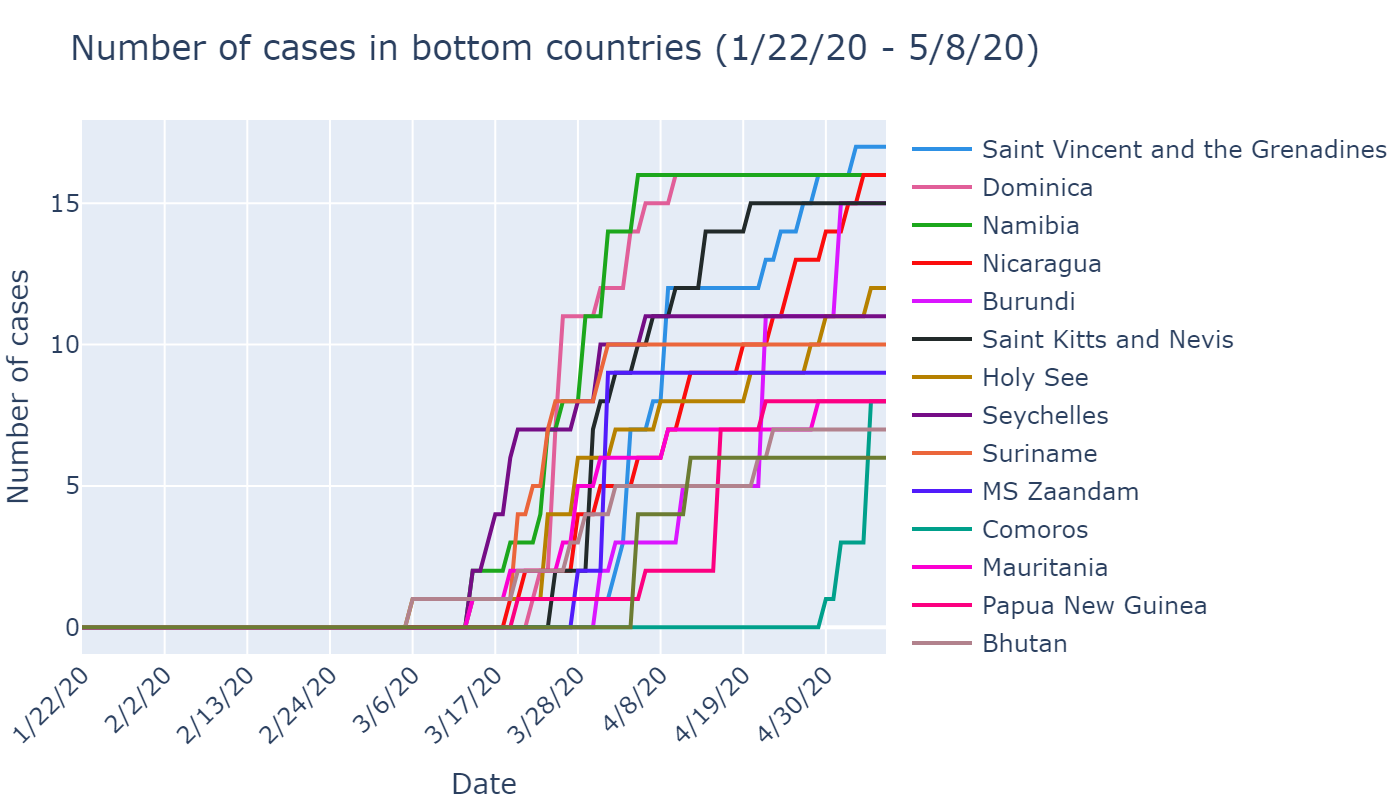

In [204]:
# Now let's look at the number of case across time for bottom countries
bottom_country.sort_values(by=[date_string[-1]], ascending=False, inplace=True)
name_bottom_country = bottom_country['Country']
matrix_num_case = bottom_country.drop(columns=['Country', 'Lat', 'Long']).to_numpy()

# Plot the number of cases
fig = go.Figure()
color_values = plotly.colors.qualitative.Dark24
for index, country in enumerate(name_bottom_country):
    fig.add_trace(go.Scatter(x=date_string, y=matrix_num_case[index, :], name=country,
                             line=dict(color=color_values[index])))

margin_size = 60
fig.update_layout(title='Number of cases in bottom countries (' + date_string[0] + ' - ' + date_string[-1] + ')',
                   xaxis_title='Date',
                   yaxis_title='Number of cases',
                 margin=dict(l=0, r=0, t=margin_size, b=margin_size), height=400)

fig.update_xaxes(tickangle=-45, nticks=10)

# Interactive plot
# fig.show()

# Static plot (for view on Github)
Image(pio.to_image(fig, format='png', scale=2))

## Something more fancy: number of cases on world map

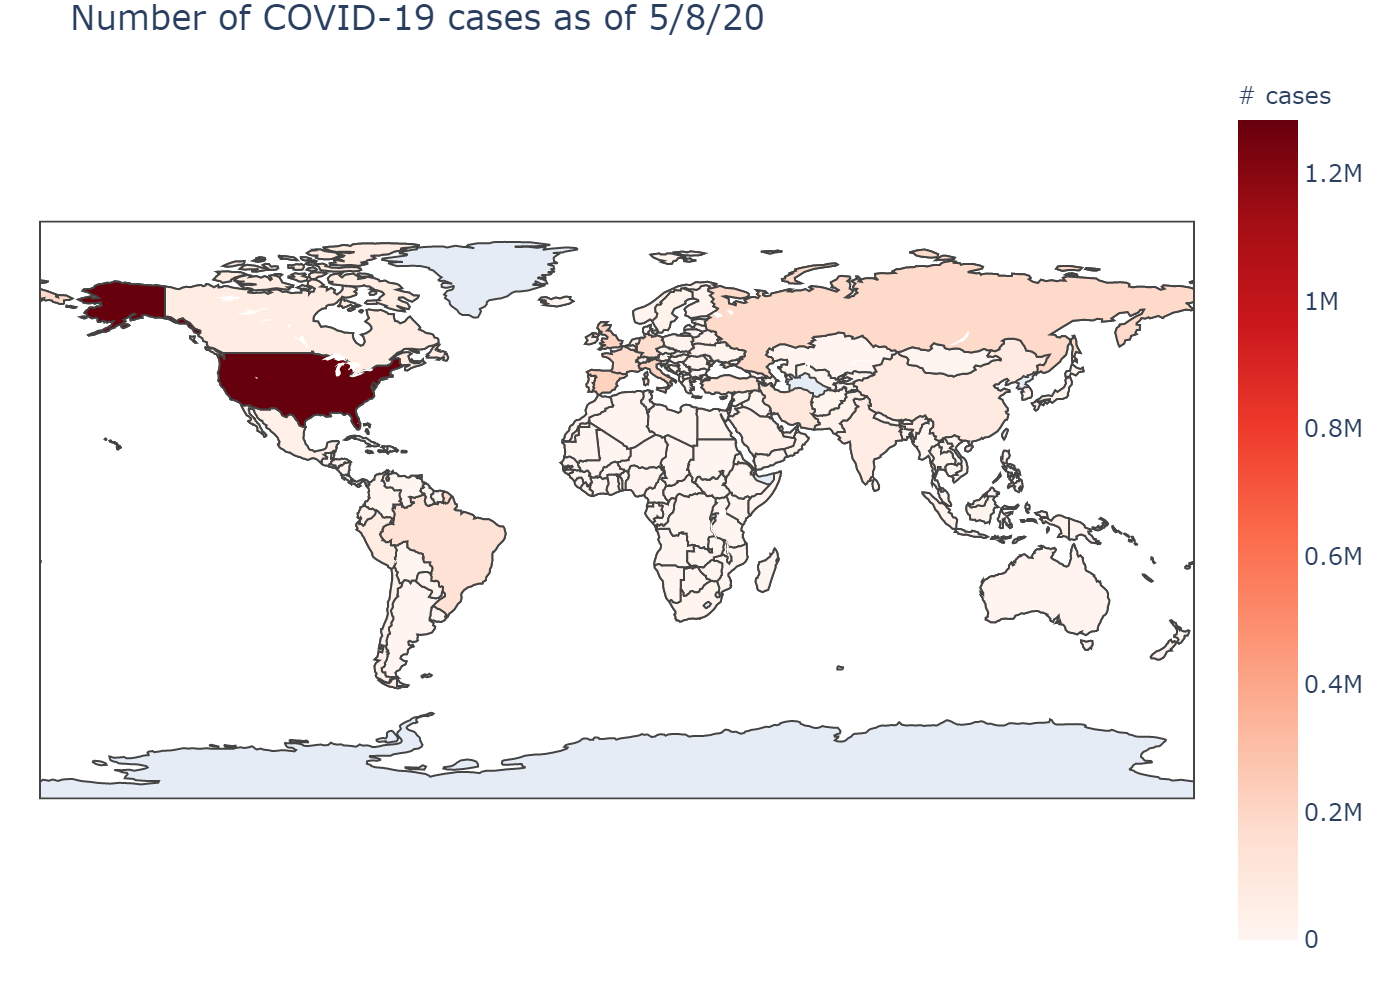

In [205]:
# Use plotly Choropleth built-in map
fig = go.Figure(data=go.Choropleth(
    locations=global_case_collapse_country["Country"], # Country names
    locationmode = 'country names', # set the mode to country name
    z = global_case_collapse_country[date_string[-1]].astype(float), # Data to be color-coded
    colorscale = 'Reds',
    colorbar_title = "# cases",
))

fig.update_layout(
    title_text = 'Number of COVID-19 cases as of ' + date_string[-1],
    margin=dict(l=20, r=20, t=30, b=20)
)

# Interactive plot
# fig.show()

# Static plot (for view on Github)
Image(pio.to_image(fig, format='png', scale=2))

It seems like US is a big outlier (American exceptionalism!) so we effectively cannot see any other country. So let's try to exclude US and see the world map again.

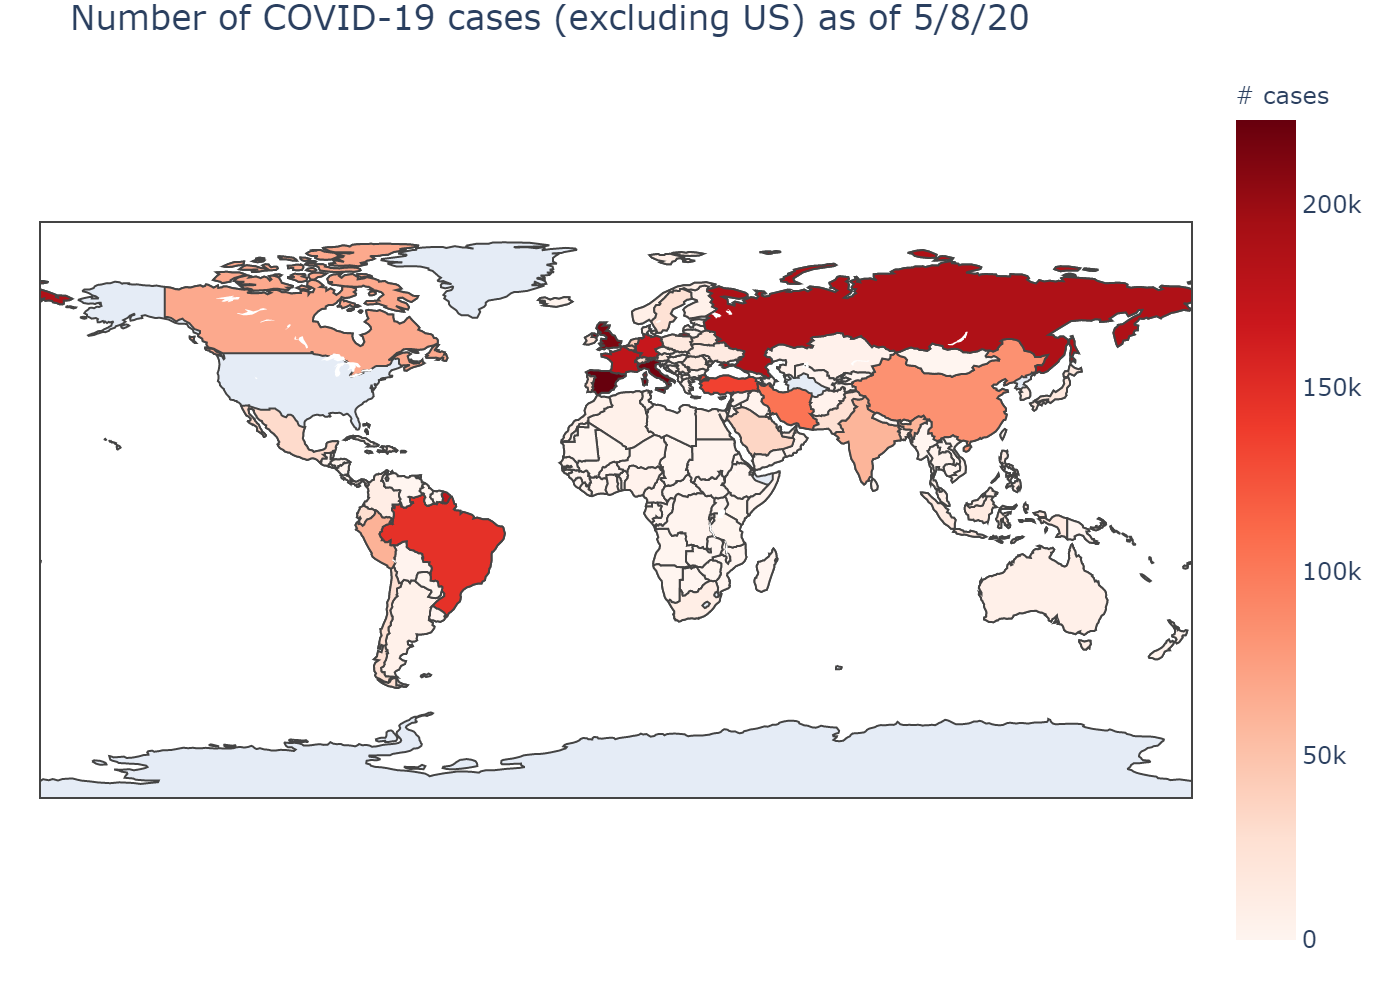

In [206]:
# Exclude US
global_case_collapse_country_excludeUS = global_case_collapse_country[global_case_collapse_country.Country != 'US']

fig = go.Figure(data=go.Choropleth(
    locations=global_case_collapse_country_excludeUS["Country"], # Country names
    locationmode = 'country names', # set the mode to country name
    z = global_case_collapse_country_excludeUS[date_string[-1]].astype(float), # Data to be color-coded
    colorscale = 'Reds',
    colorbar_title = "# cases",
))

fig.update_layout(
    title_text = 'Number of COVID-19 cases (excluding US) as of ' + date_string[-1],
    margin=dict(l=20, r=20, t=30, b=20)
)

# Interactive plot
# fig.show()

# Static plot (for view on Github)
Image(pio.to_image(fig, format='png', scale=2))

## Explore relation between number of cases and countries' features

### Latitude and Longitude

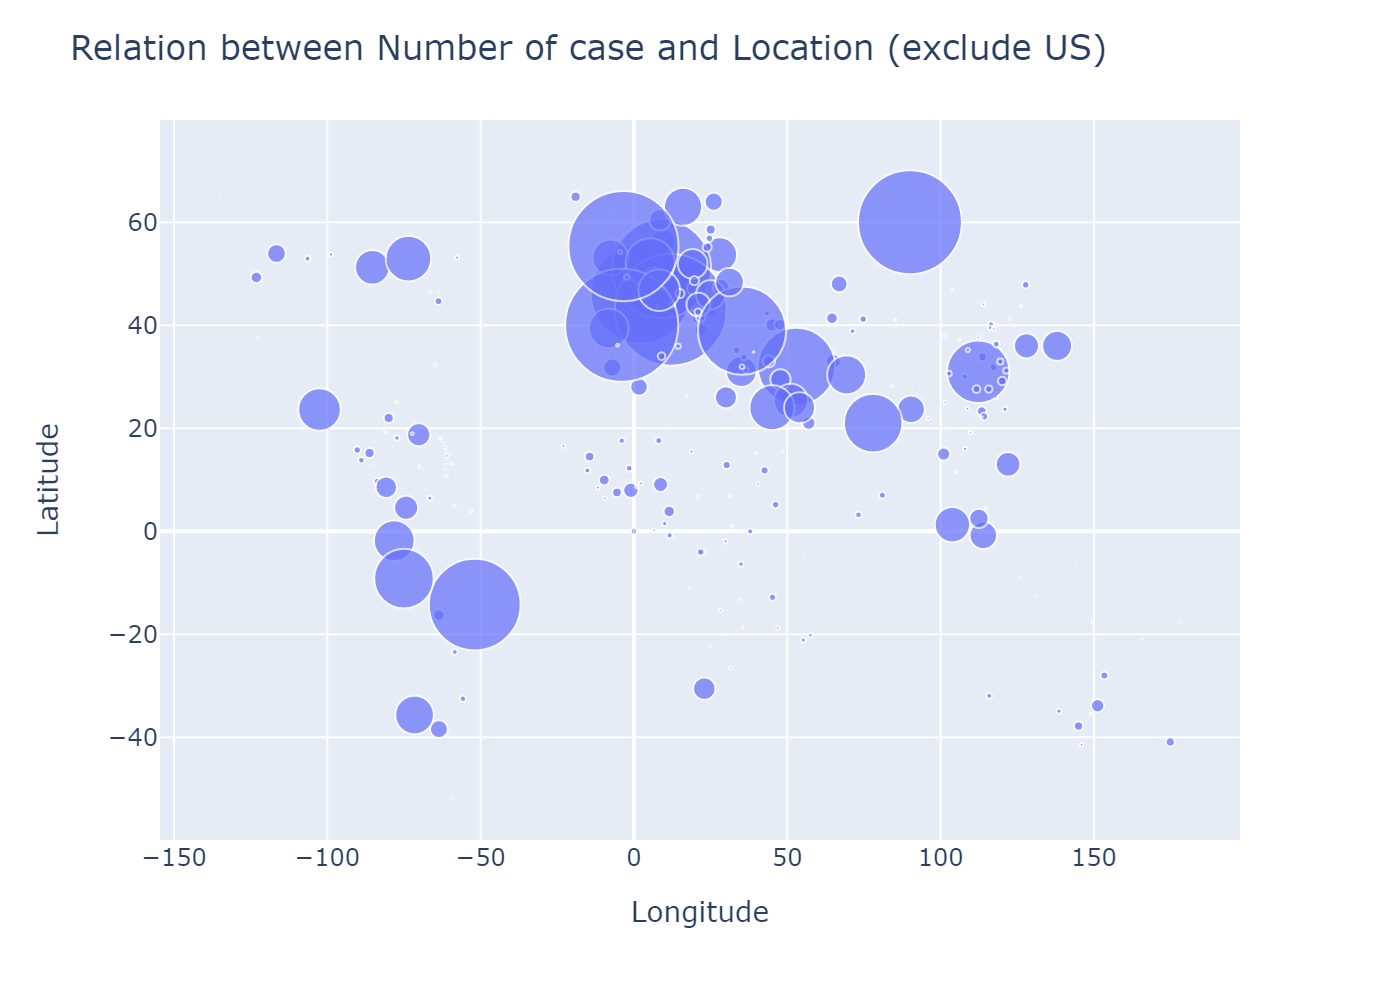

In [207]:
# Let's try bubble plot (it's similar to the world map above but instead of heatmap, 
# we use bubble size to indicate number of cases)
fig = px.scatter(global_case[global_case.Country != 'US'], x="Long", y="Lat",
                 size=date_string[-1], hover_name="Country", size_max=40)

fig.update_layout(
    title='Relation between Number of case and Location (exclude US)',
    xaxis=dict(title='Longitude'),
    yaxis=dict(title='Latitude')
)

# Interactive plot
# fig.show()

# Static plot (for view on Github)
Image(pio.to_image(fig, format='png', scale=2))

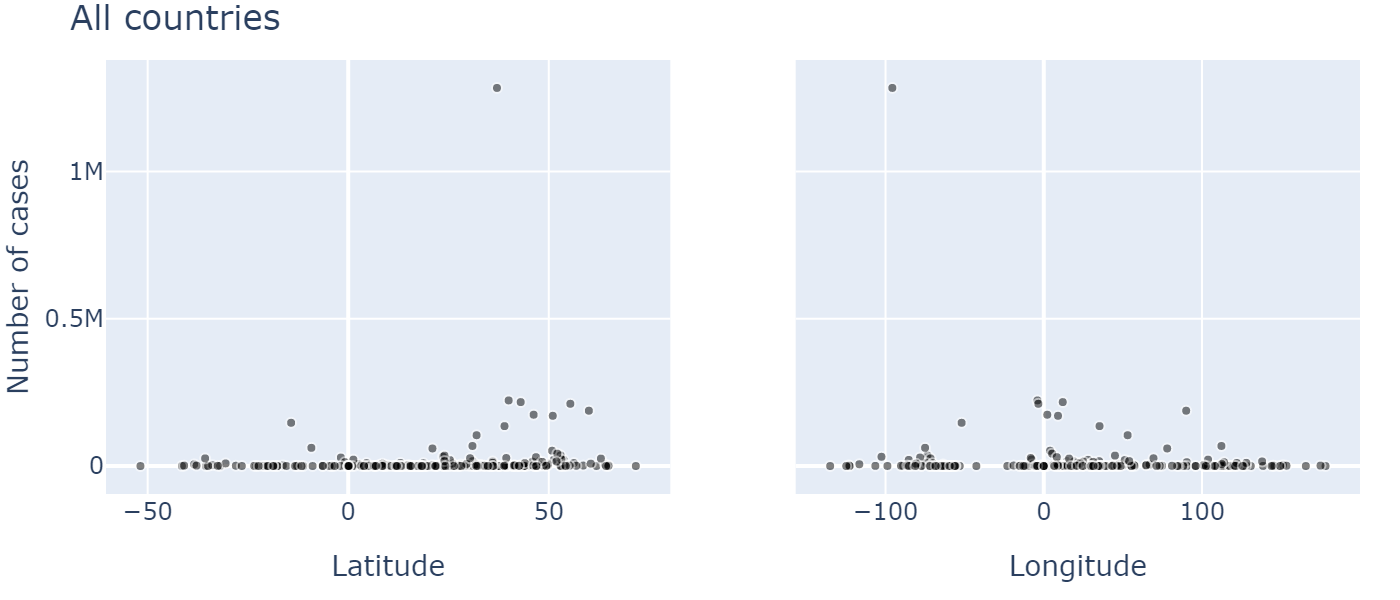

In [208]:
# Now let's split latitude and longitude
matrix_num_case = global_case.drop(columns=['Country', 'Province/State']).to_numpy()

# Plot the number of cases
fig = plotly.subplots.make_subplots(rows=1, cols=2, subplot_titles=(), shared_yaxes=True)

fig.add_trace(go.Scatter(x=matrix_num_case[:, 0], y=matrix_num_case[:, -1], mode='markers', 
              marker=dict(color='Black', size=5, opacity=0.5, line=dict(color='White', width=1))),
              row=1, col=1)
fig.add_trace(go.Scatter(x=matrix_num_case[:, 1], y=matrix_num_case[:, -1], mode='markers',
              marker=dict(color='Black', size=5, opacity=0.5, line=dict(color='White', width=1))),
              row=1, col=2)              

fig.update_xaxes(title_text="Latitude", row=1, col=1)
fig.update_yaxes(title_text="Number of cases", title_standoff = 0, row=1, col=1)
fig.update_xaxes(title_text="Longitude", row=1, col=2)
fig.update_layout(margin=dict(l=20, r=20, t=30, b=20), height=300, showlegend=False,
                 title_text="All countries")

# Interactive plot
# fig.show()

# Static plot (for view on Github)
Image(pio.to_image(fig, format='png', scale=2))

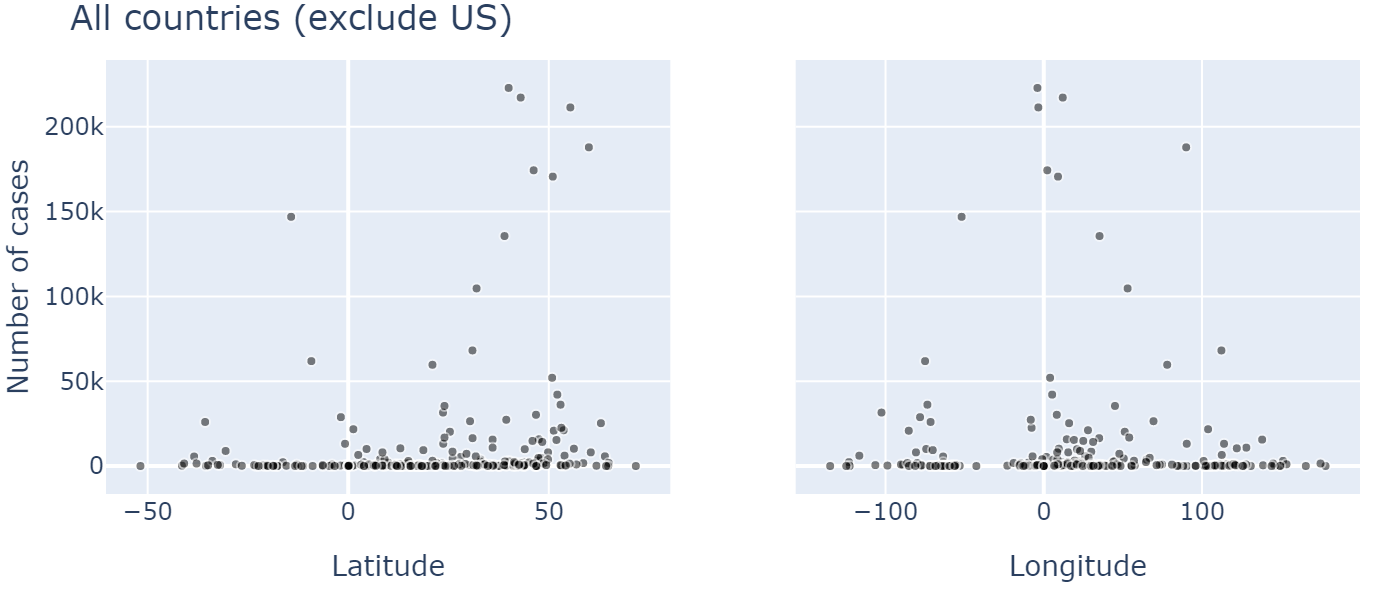

In [209]:
# Again, US is such a big outlier that we cannot see anything else
# Let's remove that big guy to look at the rest
global_case_dropUS = global_case[global_case['Country'] != 'US']
matrix_num_case = global_case_dropUS.drop(columns=['Country', 'Province/State']).to_numpy()

# Plot the number of cases
fig = plotly.subplots.make_subplots(rows=1, cols=2, subplot_titles=(), shared_yaxes=True)

fig.add_trace(go.Scatter(x=matrix_num_case[:, 0], y=matrix_num_case[:, -1], mode='markers', 
              marker=dict(color='Black', size=5, opacity=0.5, line=dict(color='White', width=1))),
              row=1, col=1)
fig.add_trace(go.Scatter(x=matrix_num_case[:, 1], y=matrix_num_case[:, -1], mode='markers',
              marker=dict(color='Black', size=5, opacity=0.5, line=dict(color='White', width=1))),
              row=1, col=2)              

fig.update_xaxes(title_text="Latitude", row=1, col=1)
fig.update_yaxes(title_text="Number of cases", title_standoff = 0, row=1, col=1)
fig.update_xaxes(title_text="Longitude", row=1, col=2)
fig.update_layout(margin=dict(l=20, r=20, t=30, b=20), height=300, showlegend=False,
                 title_text="All countries (exclude US)")

# Interactive plot
# fig.show()

# Static plot (for view on Github)
Image(pio.to_image(fig, format='png', scale=2))

**After removing US, it seems there are weak relations between latitude/longitude and number of cases. For latitude, countries that are higher up (larger latitude) tend to have more cases. For longitude, the high number of cases tend to cluster around 0, which is UK. So it seems like most cases are at European, developed countries.**

## Import external data about countries
Because we only have geographical location of countries for current dataset, we have to get external data for more features. Here I try population and GDP dataset from World Bank: https://data.worldbank.org/

In [210]:
# Load data
print('Beginning data loading ...')

# Data directory
dir_data = os.path.join(os.getcwd(), 'data')

# GDP
dir_GDP = os.path.join(dir_data, 'GDP_2018.csv')
GDP = pd.read_csv(dir_GDP)

# Population
dir_population = os.path.join(dir_data, 'Population_2018.csv')
population = pd.read_csv(dir_population)
    
print('Data loading finished!')

Beginning data loading ...
Data loading finished!


In [211]:
# Explore the data
GDP.head(n=2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.390503e+09,2.549721e+09,2.534637e+09,2.581564e+09,2.649721e+09,2.691620e+09,2.646927e+09,2.700559e+09,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,537777811.1,548888895.6,546666677.8,751111191.1,800000044.4,1.006667e+09,...,1.585657e+10,1.780428e+10,2.000162e+10,2.056105e+10,2.048487e+10,1.990711e+10,1.936264e+10,2.019176e+10,1.936297e+10,NaN


In [212]:
population.head(n=2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,NaN


## Cleaning the data
The big problem is that some countries' names in COVID-19 data do not match those in GDP/Population data (e.g. 'US' in COVID-19 is 'United States' in GDP/Population).

So first I find the countries in GDP/Population that are not in COVID-19 using this code:

<pre><code> GDP_not_in_list = GDP[~GDP['Country Name'].isin(unique_country_name)]
list(GDP_not_in_list['Country Name']) </code></pre>

Note that some names in the list are not even countries but some groups (e.g. 'World', 'East Asia & Pacific').

Then I cross-checked each one in that list with the country list of COVID-19 and if I found a plausible match, I put that pairs into 2 lists 'replace_old' and 'replace_new'.

Using the list, I replace the country's names in GDP/Population table to match the names of COVID-19 data.

Finally, I select only countries in GDP/Population that match COVID-19 data.

In [213]:
# List of the same non-match countries
replace_old = ['Bahamas, The',
              'Brunei Darussalam',
              'Congo, Dem. Rep.',
               'Congo, Rep.',
               'Czech Republic',
               'Egypt, Arab Rep.',
               'Gambia, The', 
               'Iran, Islamic Rep.',
               'Kyrgyz Republic',
               'St. Kitts and Nevis',
               'Korea, Rep.',
               'Lao PDR',
               'St. Lucia',
               'Myanmar',
               'Russian Federation',
               'Slovak Republic',
               'Syrian Arab Republic',
               'United States',
               'St. Vincent and the Grenadines',
               'Venezuela, RB',
               'Yemen, Rep.'
              ]
replace_new = ['Bahamas',
              'Brunei',
              'Congo (Kinshasa)',
              'Congo (Brazzaville)',
              'Czechia',
              'Egypt',
              'Gambia',
              'Iran',
              'Kyrgyzstan',
              'Saint Kitts and Nevis',
              'Korea, South',
              'Laos',
              'Saint Lucia',
              'Burma',
              'Russia',
              'Slovakia',
              'Syria',
              'US',
              'Saint Vincent and the Grenadines',
              'Venezuela',
              'Yemen']

# Replace the name to match COVID-19 data
GDP.replace(replace_old, replace_new, inplace=True)
population.replace(replace_old, replace_new, inplace=True)

In [214]:
# Select only countries that match COVID-19 data
country_COVID = unique_country_name
GDP = GDP[GDP['Country Name'].isin(country_COVID)]
population = population[population['Country Name'].isin(country_COVID)]

In [215]:
# Drop some columns that are not useful
GDP.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code', '2019'], inplace=True)
population.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code', '2019'], inplace=True)

# Rename feature Country Name to Country to avoid headache later
GDP.rename(columns={'Country Name': 'Country_GDP'}, inplace=True)
population.rename(columns={'Country Name': 'Country_Population'}, inplace=True)

In [216]:
# Display the top countries to see if our manipulation makes sense
GDP.sort_values(by='2018', ascending=False).head(5)

,Country_GDP,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
249,US,5.433000e+11,5.633000e+11,6.051000e+11,6.386000e+11,6.858000e+11,7.437000e+11,8.150000e+11,8.617000e+11,9.425000e+11,...,1.444890e+13,1.499210e+13,1.554260e+13,1.619700e+13,1.678480e+13,1.752170e+13,1.821930e+13,1.870720e+13,1.948540e+13,2.054430e+13
38,China,5.971647e+10,5.005687e+10,4.720936e+10,5.070680e+10,5.970834e+10,7.043627e+10,7.672029e+10,7.288163e+10,7.084654e+10,...,5.101700e+12,6.087160e+12,7.551500e+12,8.532230e+12,9.570410e+12,1.043850e+13,1.101550e+13,1.113790e+13,1.214350e+13,1.360820e+13
117,Japan,4.430734e+10,5.350862e+10,6.072302e+10,6.949813e+10,8.174901e+10,9.095028e+10,1.056280e+11,1.237820e+11,1.466010e+11,...,5.231380e+12,5.700100e+12,6.157460e+12,6.203210e+12,5.155720e+12,4.850410e+12,4.389480e+12,4.926670e+12,4.859950e+12,4.971320e+12
53,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.397790e+12,3.396350e+12,3.744410e+12,3.527340e+12,3.732740e+12,3.883920e+12,3.360550e+12,3.466790e+12,3.656750e+12,3.947620e+12
79,United Kingdom,7.323397e+10,7.774197e+10,8.124756e+10,8.656196e+10,9.440756e+10,1.018250e+11,1.085730e+11,1.131170e+11,1.077600e+11,...,2.410910e+12,2.475240e+12,2.659310e+12,2.704890e+12,2.786020e+12,3.063800e+12,2.928590e+12,2.694280e+12,2.666230e+12,2.855300e+12


In [217]:
population.sort_values(by='2018', ascending=False).head(5)

,Country_Population,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
38,China,667070000.0,660330000.0,665770000.0,682335000.0,698355000.0,715185000.0,735400000.0,754550000.0,774510000.0,...,1.331260e+09,1.337705e+09,1.344130e+09,1.350695e+09,1.357380e+09,1.364270e+09,1.371220e+09,1.378665e+09,1.386395e+09,1.392730e+09
107,India,450547679.0,459642165.0,469077190.0,478825608.0,488848135.0,499123324.0,509631500.0,520400576.0,531513824.0,...,1.217726e+09,1.234281e+09,1.250289e+09,1.265783e+09,1.280846e+09,1.295604e+09,1.310152e+09,1.324510e+09,1.338659e+09,1.352617e+09
249,US,180671000.0,183691000.0,186538000.0,189242000.0,191889000.0,194303000.0,196560000.0,198712000.0,200706000.0,...,3.067715e+08,3.093217e+08,3.115569e+08,3.138310e+08,3.159937e+08,3.183010e+08,3.206352e+08,3.229413e+08,3.249855e+08,3.266875e+08
104,Indonesia,87751068.0,90098394.0,92518377.0,95015297.0,97596733.0,100267062.0,103025426.0,105865571.0,108779924.0,...,2.386206e+08,2.418342e+08,2.451162e+08,2.484524e+08,2.518064e+08,2.551290e+08,2.583833e+08,2.615542e+08,2.646459e+08,2.676634e+08
182,Pakistan,44988690.0,46065231.0,47198878.0,48387301.0,49627623.0,50917975.0,52260189.0,53655789.0,55102684.0,...,1.755256e+08,1.794246e+08,1.833406e+08,1.872815e+08,1.912629e+08,1.953068e+08,1.994270e+08,2.036273e+08,2.078967e+08,2.122150e+08


Now, we are gonna use only 2018 data. However, not all countries have data in 2018 so let's fill in with the latest available data for those countries

In [218]:
# Check for missing values
n_na_GDP = list(np.sum(GDP[['2018']].isna()==True))
n_na_population = list(np.sum(population[['2018']].isna()==True))
print("Number of missing value in GDP 2018: " + str(n_na_GDP[0]))
print("Number of missing value in population 2018: " + str(n_na_population[0]))

Number of missing value in GDP 2018: 7
Number of missing value in population 2018: 1


In [219]:
# Replace NaN in GDP 
temp_df = GDP.loc[GDP['2018'].isna(), '1960':'2018'].fillna(method='ffill', axis = 'columns')
GDP.loc[GDP['2018'].isna(), '2018'] = temp_df['2018']

# Replace NaN in Population 
temp_df = population.loc[population['2018'].isna(), '1960':'2018'].fillna(method='ffill', axis = 'columns')
population.loc[population['2018'].isna(), '2018'] = temp_df['2018']

## Check the imported data
Let's plot the GDP and population on the world map again to check if the data make sense and also to gain overal view of the data.

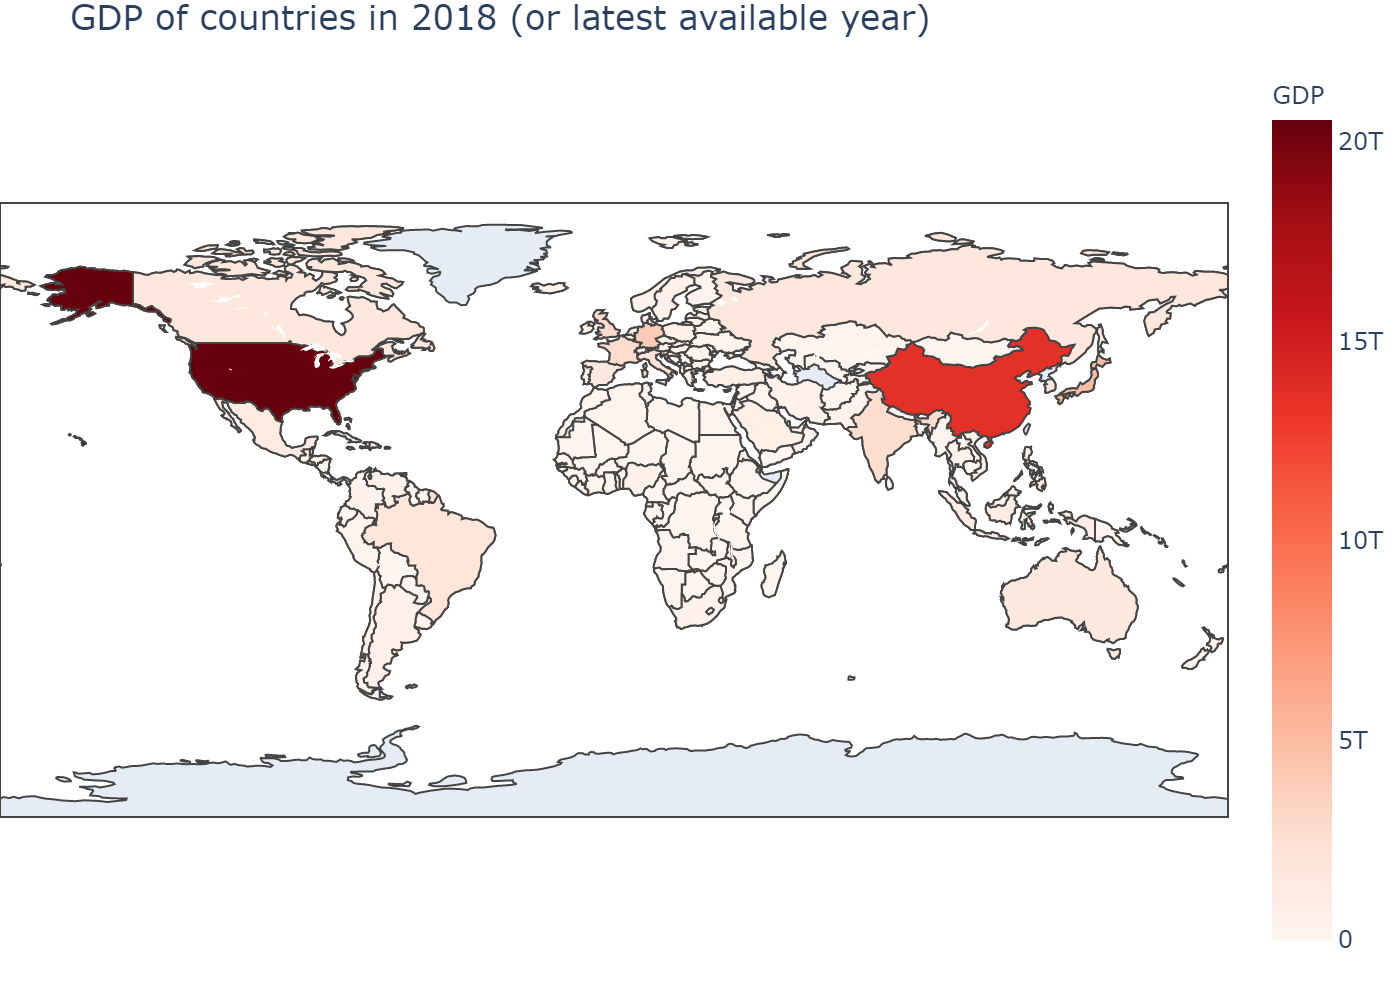

In [221]:
# First plot GDP
fig = go.Figure(data=go.Choropleth(
    locations=GDP["Country_GDP"], # Country names
    locationmode = 'country names', # set the mode to "country names"
    z = GDP["2018"].astype(float), # Data to be color-coded
    colorscale = 'Reds',
    colorbar_title = "GDP",
))

fig.update_layout(
    title_text = 'GDP of countries in 2018 (or latest available year)',
    margin=dict(l=0, r=0, t=30, b=20)
)

# Interactive plot
# fig.show()

# Static plot (for view on Github)
Image(pio.to_image(fig, format='png', scale=2))

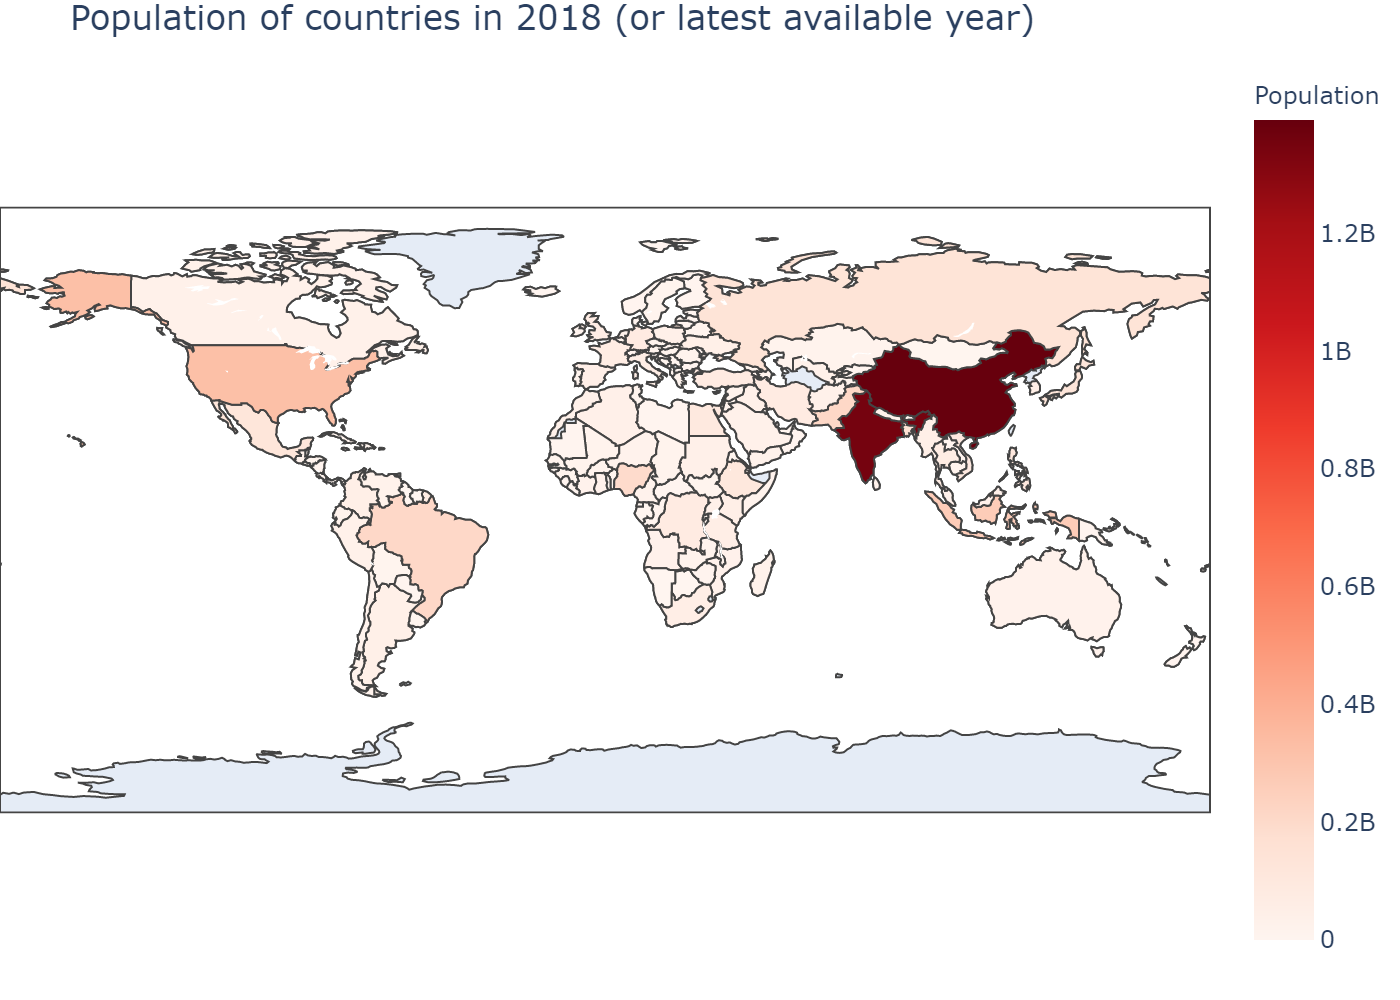

In [222]:
# Then plot population
fig = go.Figure(data=go.Choropleth(
    locations=population["Country_Population"], # Country names
    locationmode = 'country names', # set the mode to "country names"
    z = population["2018"].astype(float), # Data to be color-coded
    colorscale = 'Reds',
    colorbar_title = "Population",
))

fig.update_layout(
    title_text = 'Population of countries in 2018 (or latest available year)',
    margin=dict(l=0, r=0, t=30, b=20)
)

# Interactive plot
# fig.show()

# Static plot (for view on Github)
Image(pio.to_image(fig, format='png', scale=2))

## Create a new table to merge GDP, population and COVID-19 tables
Note that some countries in COVID-19 data do not appear in GDP/population data. Again we can try to clean this up but there are only a few of them so for now let's ignore that and only take the countries existing in all datasets.

In [224]:
# Take a look at some countries that are not in GDP/population
country_missed = []
country_GDP = list(GDP['Country_GDP'])
for country in country_COVID:
    if country not in country_GDP:
        country_missed.append(country)
        
print("Countries missed in GDP/population: ", country_missed)

Countries missed in GDP/population:  ['Diamond Princess', 'Holy See', 'Taiwan*', 'MS Zaandam', 'Western Sahara']


In [225]:
# Rename the last column of GDP and population before joining
GDP.rename(columns={'2018': 'GDP'}, inplace=True)
population.rename(columns={'2018': 'Population'}, inplace=True)

In [226]:
# Merge the tables
table_COVID_GDP_pop = global_case_collapse_country.merge(GDP[['Country_GDP', 'GDP']], left_on='Country', right_on='Country_GDP', how='inner')
table_COVID_GDP_pop = table_COVID_GDP_pop.merge(population[['Country_Population', 'Population']], left_on='Country', right_on='Country_Population', how='inner')

In [227]:
# Let's check
table_COVID_GDP_pop.head(2)

,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,Country_GDP,GDP,Country_Population,Population
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,2704,2894,3224,3392,3563,3778,Afghanistan,1.936297e+10,Afghanistan,37172386.0
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,795,803,820,832,842,850,Albania,1.510250e+10,Albania,2866376.0


In [228]:
# Drop the redundant columns
table_COVID_GDP_pop.drop(columns=['Country_Population', 'Country_GDP'], inplace=True)

In [ ]:
# Sanity check, plot the population map again to see if our manipulation makes sense
fig = go.Figure(data=go.Choropleth(
    locations=table_COVID_GDP_pop["Country"], # Country names
    locationmode = 'country names', # set the mode to "country names"
    z = table_COVID_GDP_pop["GDP"].astype(float), # Data to be color-coded
    colorscale = 'Reds',
    colorbar_title = "GDP",
))

fig.update_layout(
    title_text = 'GDP of countries in 2018 (or latest available year)',
    margin=dict(l=0, r=0, t=30, b=20)
)

# Interactive plot
# fig.show()

# Static plot (for view on Github)
Image(pio.to_image(fig, format='png', scale=2))

## Relation between COVID-19 cases and GDP/Population

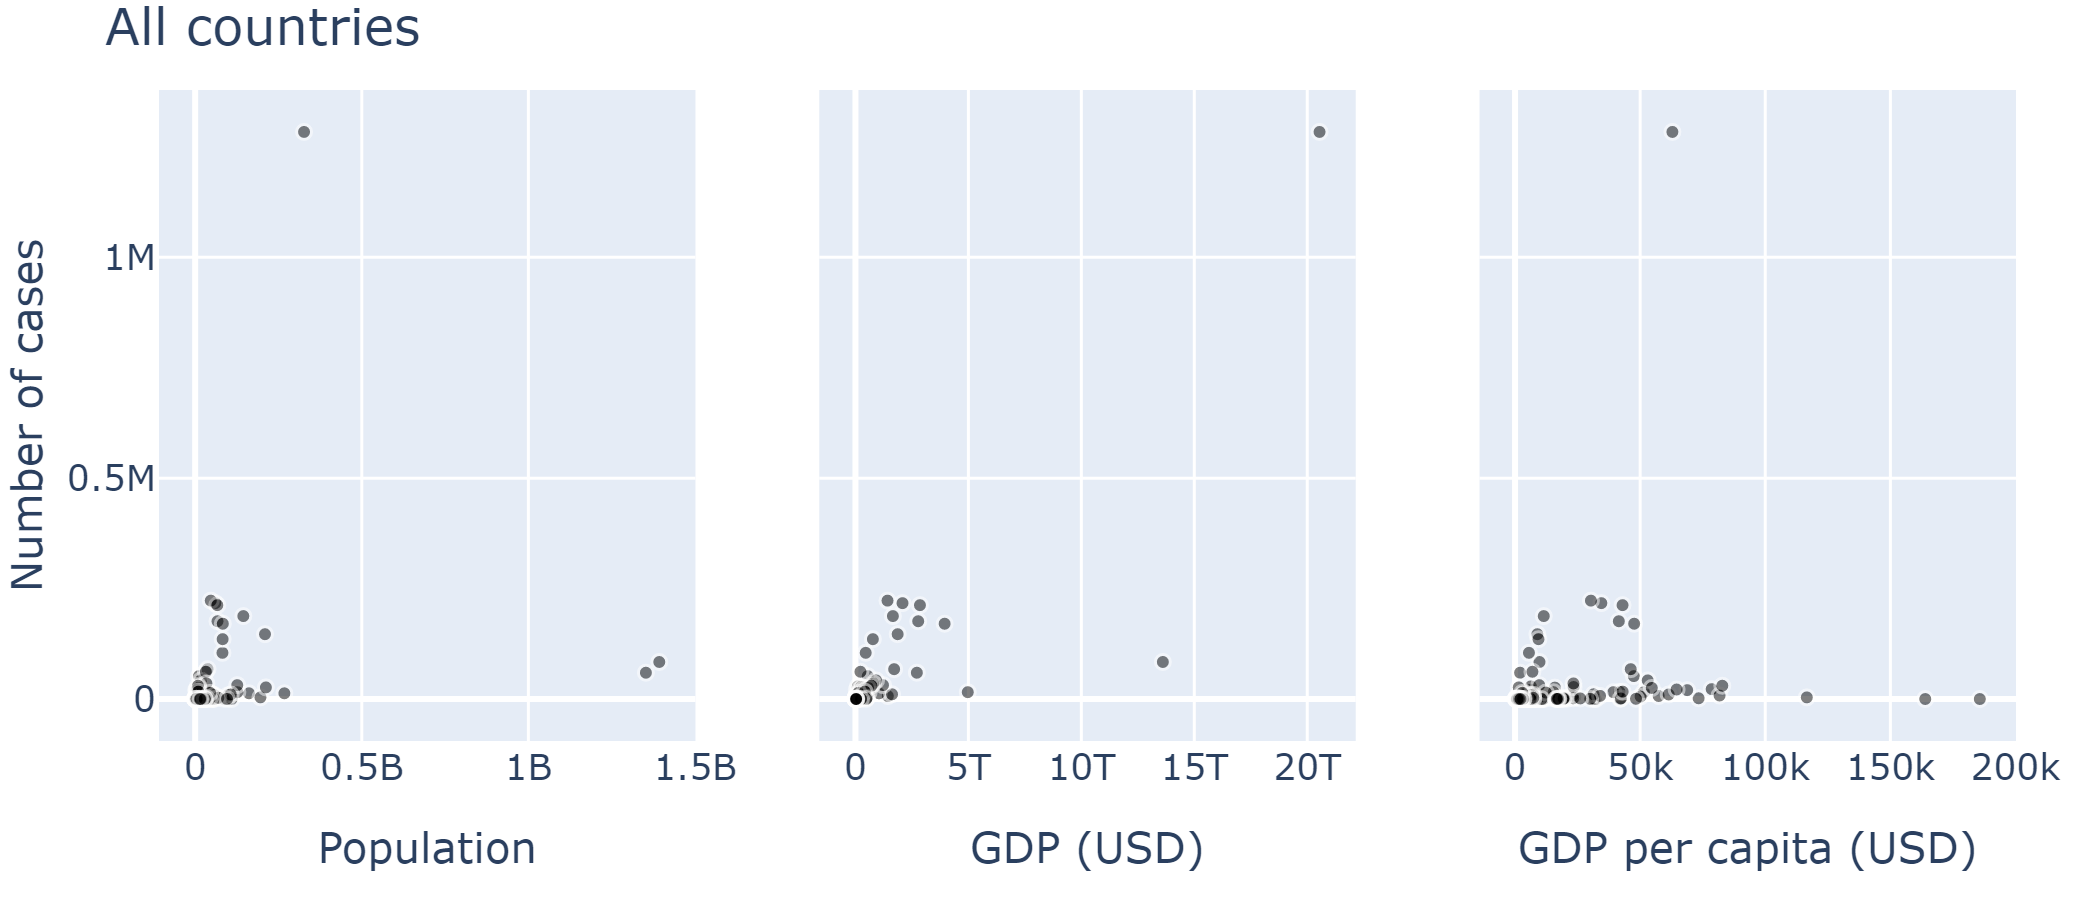

In [229]:
# Look at all countries
matrix_num_case = table_COVID_GDP_pop.drop(table_COVID_GDP_pop.iloc[:, :-3], axis=1).to_numpy()
gdp_per_captia = matrix_num_case[:, -2] / matrix_num_case[:, -1]
country_COVID_GDP_pop = list(table_COVID_GDP_pop['Country'])

# Plot the number of cases
fig = plotly.subplots.make_subplots(rows=1, cols=3, subplot_titles=(), shared_yaxes=True)

fig.add_trace(go.Scatter(x=matrix_num_case[:, -1], y=matrix_num_case[:, -3], mode='markers', 
              marker=dict(color='Black', size=5, opacity=0.5, line=dict(color='White', width=1)), 
              hovertext=country_COVID_GDP_pop),
              row=1, col=1)
fig.add_trace(go.Scatter(x=matrix_num_case[:, -2], y=matrix_num_case[:, -3], mode='markers',
              marker=dict(color='Black', size=5, opacity=0.5, line=dict(color='White', width=1)),
              hovertext=country_COVID_GDP_pop),                         
              row=1, col=2)              
fig.add_trace(go.Scatter(x=gdp_per_captia, y=matrix_num_case[:, -3], mode='markers',
              marker=dict(color='Black', size=5, opacity=0.5, line=dict(color='White', width=1)),
              hovertext=country_COVID_GDP_pop),                         
              row=1, col=3)  

fig.update_yaxes(title_text="Number of cases", title_standoff = 0, row=1, col=1)
fig.update_xaxes(title_text="Population", row=1, col=1)
fig.update_xaxes(title_text="GDP (USD)", row=1, col=2)
fig.update_xaxes(title_text="GDP per capita (USD)", row=1, col=3)
fig.update_layout(margin=dict(l=20, r=20, t=30, b=20), height=300, showlegend=False, 
                  title_text="All countries")

# Interactive plot
# fig.show()

# Static plot (for view on Github)
Image(pio.to_image(fig, format='png', scale=3))

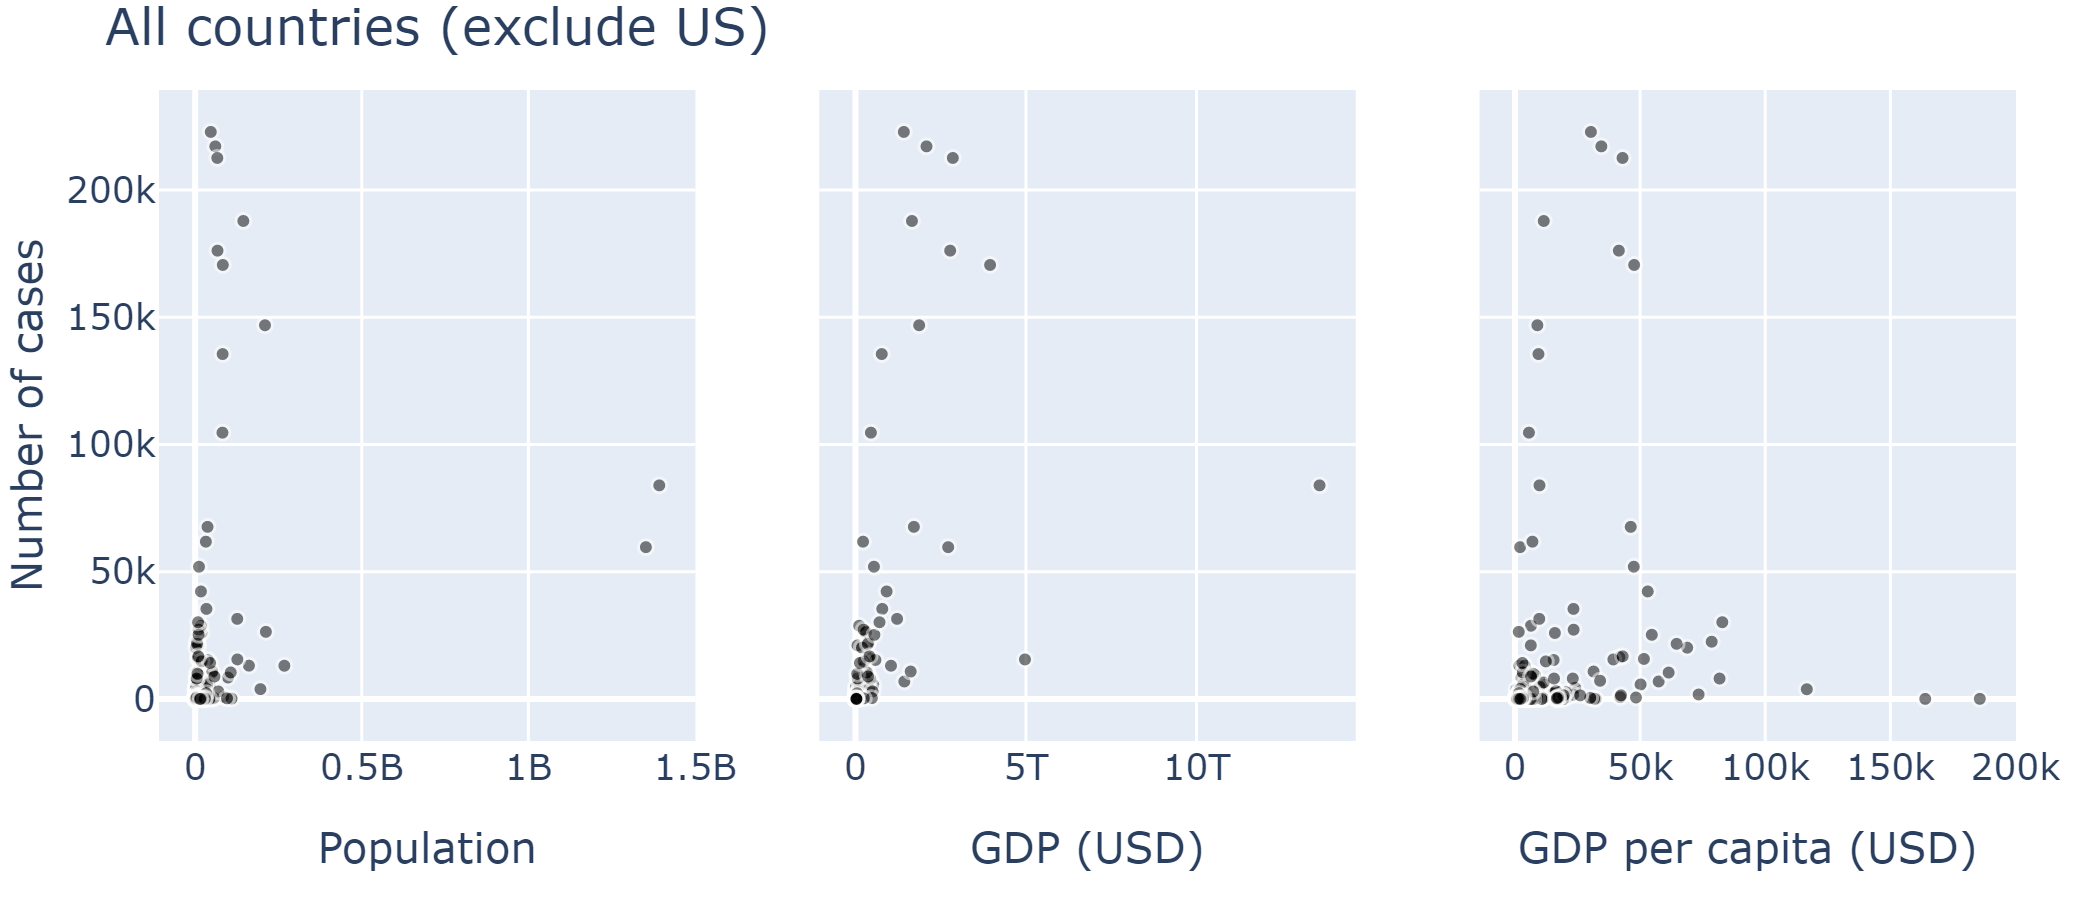

In [230]:
# Exclude US
matrix_num_case = table_COVID_GDP_pop.drop(table_COVID_GDP_pop.iloc[:, :-3], axis=1).drop(table_COVID_GDP_pop.loc[table_COVID_GDP_pop['Country']=='US'].index).to_numpy()
gdp_per_captia = matrix_num_case[:, -2] / matrix_num_case[:, -1]

# Plot the number of cases
fig = plotly.subplots.make_subplots(rows=1, cols=3, subplot_titles=(), shared_yaxes=True)

fig.add_trace(go.Scatter(x=matrix_num_case[:, -1], y=matrix_num_case[:, -3], mode='markers', 
              marker=dict(color='Black', size=5, opacity=0.5, line=dict(color='White', width=1)), 
              hovertext=country_COVID_GDP_pop),
              row=1, col=1)
fig.add_trace(go.Scatter(x=matrix_num_case[:, -2], y=matrix_num_case[:, -3], mode='markers',
              marker=dict(color='Black', size=5, opacity=0.5, line=dict(color='White', width=1)),
              hovertext=country_COVID_GDP_pop),                         
              row=1, col=2)              
fig.add_trace(go.Scatter(x=gdp_per_captia, y=matrix_num_case[:, -3], mode='markers',
              marker=dict(color='Black', size=5, opacity=0.5, line=dict(color='White', width=1)),
              hovertext=country_COVID_GDP_pop),                         
              row=1, col=3)  

fig.update_yaxes(title_text="Number of cases", title_standoff = 0, row=1, col=1)
fig.update_xaxes(title_text="Population", row=1, col=1)
fig.update_xaxes(title_text="GDP (USD)", row=1, col=2)
fig.update_xaxes(title_text="GDP per capita (USD)", row=1, col=3)
fig.update_layout(margin=dict(l=20, r=20, t=30, b=20), height=300, showlegend=False, 
                  title_text="All countries (exclude US)")

# Interactive plot
# fig.show()

# Static plot (for view on Github)
Image(pio.to_image(fig, format='png', scale=3))

**First, there's some correlation between population and the number of case but that is apparently trivial (the more number of people you have, the more cases you should expect). There are 3 obvious outliers (US, China and India). For US, population does not justify the insane number of cases. For China, the data may be a bit dubious.**

**Second, there is stronger correlation between GDP and number of case. Intuitively, that makes sense because the more economic activity, the more travel, which is surely the number one cause of disease transmission. However, the relation is confounded by population because GDP is the total economic output so obviously the higher population, the larger GDP. Therefore, I look at GDP per capita (GDP divided by population). Doing that reduces the correlation but there is still some trend. Note that GDP per capita is not necessarily better indicator of economic activity than GDP because there are small rich countries. For example, 3 obvious oulier countries on the right are Monaco, Liechtenstein and Luxembourg. Those countries may be rich and small but I doubt there's a lot of economic activity there.**

# Global number of deaths

## Clean up the data a bit
Here the data structure should be similar to global case.

Also, given our analysis of number of case, the death rate may be more informative than the number of death. So here we will also look at the death rate.

In [232]:
# Rename feature Country/Region to Country to avoid headache later
global_death.rename(columns={'Country/Region': 'Country'}, inplace=True)

# Collapse across countries 
global_death_collapse_country = global_death.groupby('Country').sum().reset_index()

In [252]:
# Create new table of death rate
global_death_rate = global_death.iloc[:, 2:].div(global_case.iloc[:, 2:]).mul(100)
global_death_rate.insert(0, 'Country', global_death['Country'])
global_death_rate_collapse_country = global_death_rate.groupby('Country').mean().reset_index()

## Look at the number of deaths

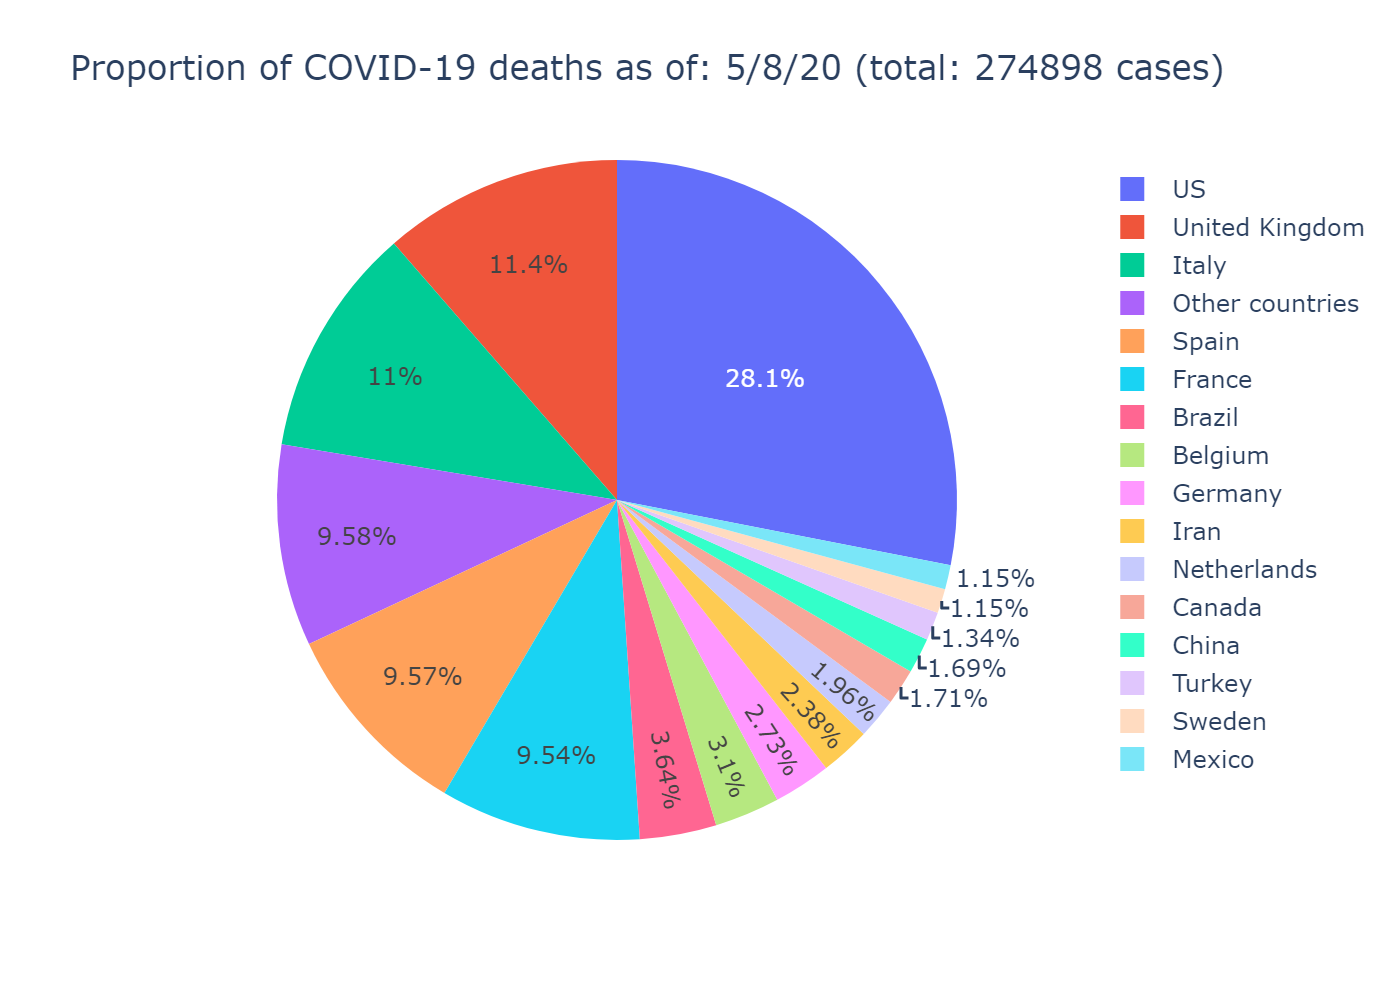

In [290]:
# First look at the number of deaths
total_case = global_death_collapse_country[date_string[-1]].sum()
top_country = global_death_collapse_country.nlargest(15, date_string[-1])
country_collapse_bottom = global_death_collapse_country.copy()
country_collapse_bottom.loc[country_collapse_bottom[date_string[-1]] < top_country[date_string[-1]].min(),
                            'Country'] = 'Other countries'


# Pie chart
fig = px.pie(country_collapse_bottom, values=date_string[-1], names='Country',
             title='Proportion of COVID-19 deaths as of: ' + date_string[-1] + " (total: " + str(total_case) + " cases)")

margin_size = 80
fig.update_layout(margin=dict(l=margin_size, r=margin_size, t=margin_size, b=margin_size))

# Interactive plot
# fig.show()

# Static plot (to show the figures on Github, I have to convert to static image)
# For interactive plot, use the interactive plot above
Image(pio.to_image(fig, format='png', scale=2))

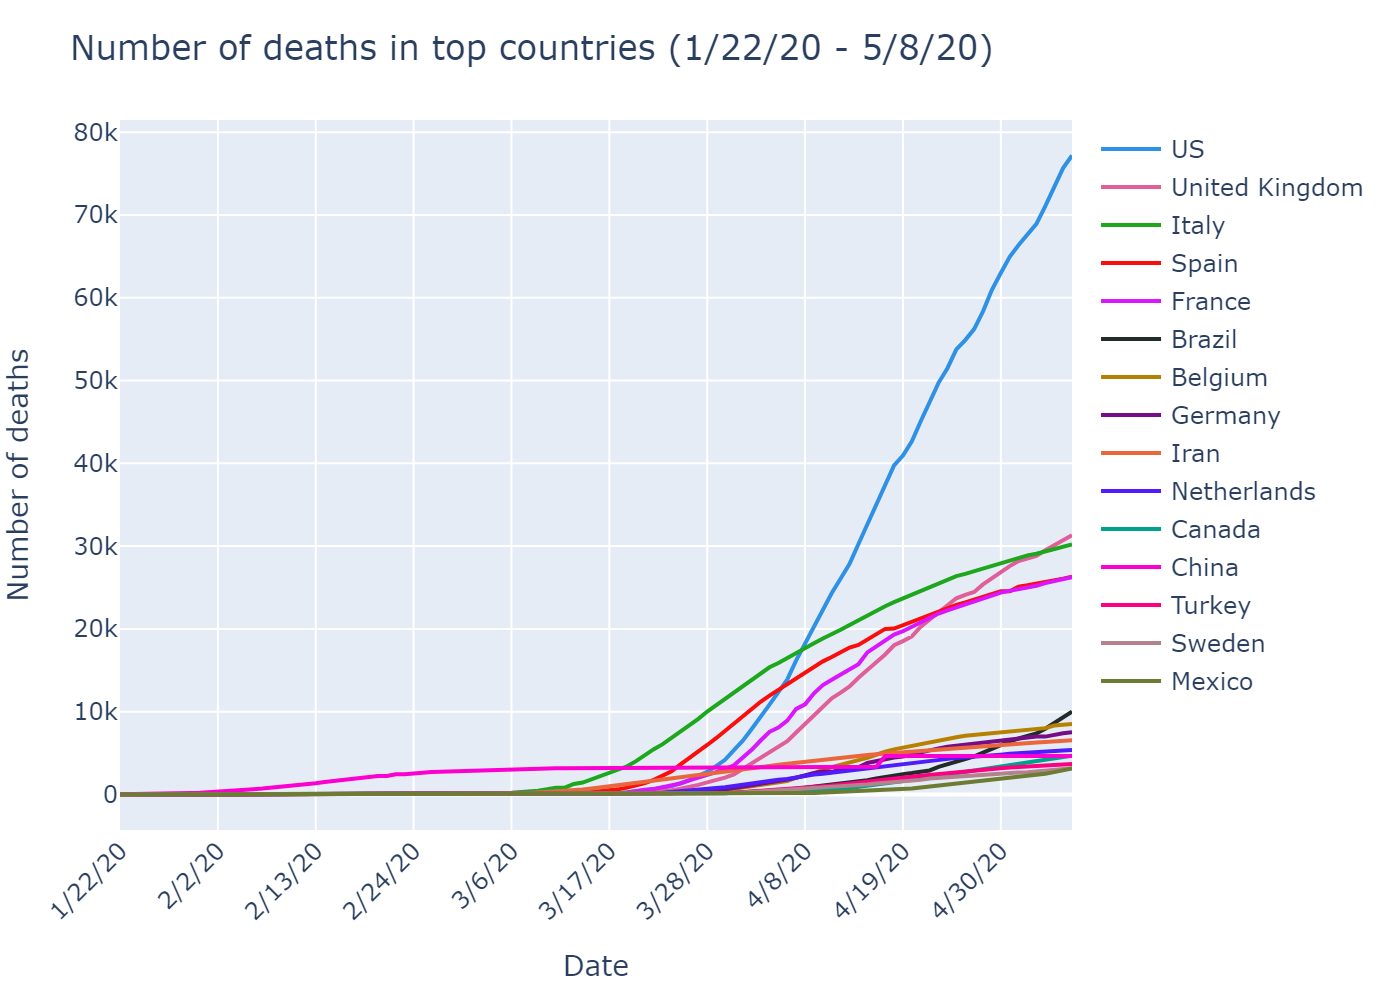

In [282]:
# Now let's look at the number of case across time for top countries
name_top_country = top_country['Country']
matrix_num_case = top_country.drop(columns=['Country', 'Lat', 'Long']).to_numpy()

# Plot the number of cases
fig = go.Figure()
color_values = plotly.colors.qualitative.Dark24
for index, country in enumerate(name_top_country):
    fig.add_trace(go.Scatter(x=date_string, y=matrix_num_case[index, :], name=country,
                             line=dict(color=color_values[index])))
    
margin_size = 60
fig.update_layout(title='Number of deaths in top countries (' + date_string[0] + ' - ' + date_string[-1] + ')',
                   xaxis_title='Date',
                   yaxis_title='Number of deaths',
                 margin=dict(l=margin_size, r=margin_size, t=margin_size, b=margin_size), height=500)
fig.update_xaxes(tickangle=-45, nticks=10)

# Interactive plot
# fig.show()

# Static plot (for view on Github)
Image(pio.to_image(fig, format='png', scale=2))

## Look at the death rates

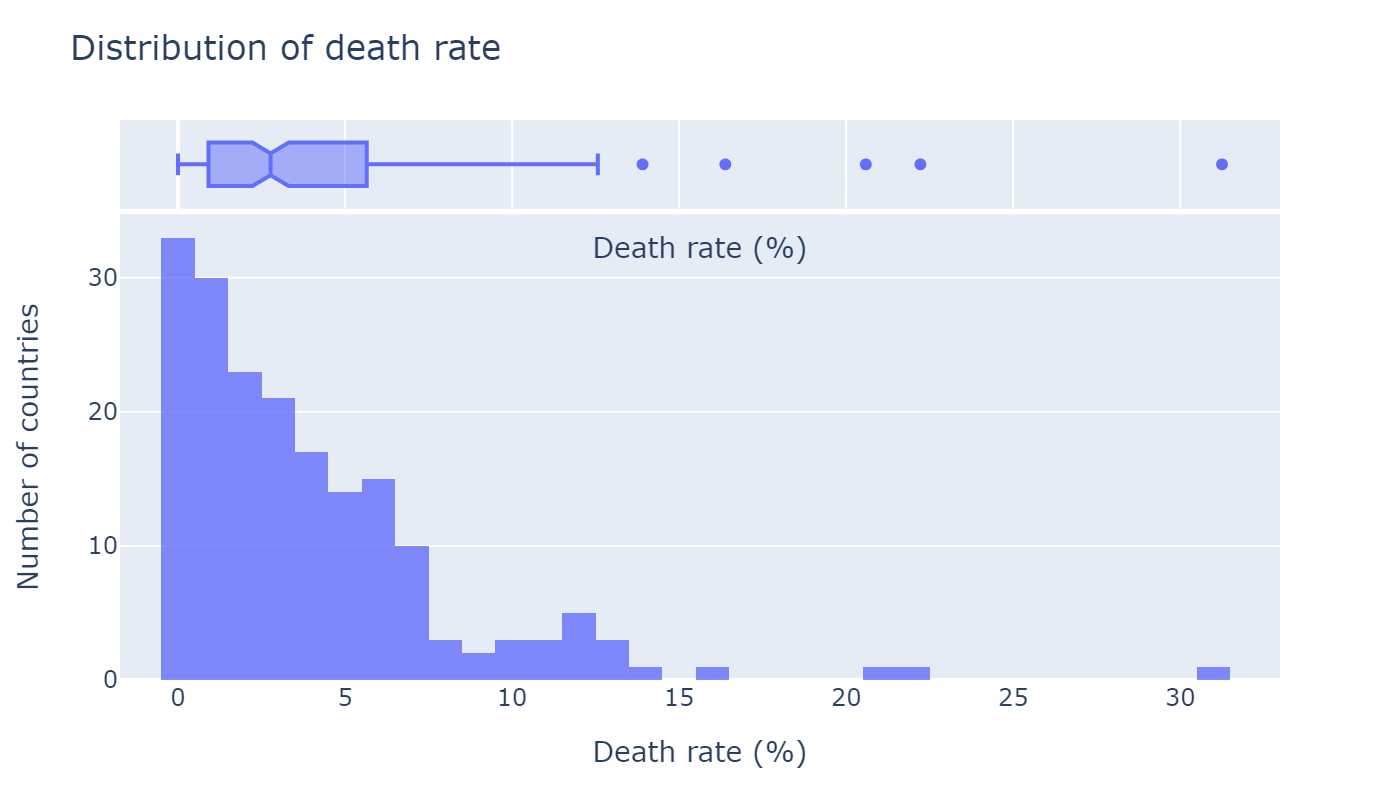

In [279]:
# Distribution of death rate
fig = px.histogram(global_death_rate_collapse_country, x=date_string[-1],
                   title='Distribution of death rate',
                   opacity=0.8, nbins=60,
                   marginal="box")

margin_size = 60
fig.update_layout(margin=dict(l=margin_size, r=margin_size, t=margin_size, b=margin_size), height=400)
fig.update_xaxes(title_text="Death rate (%)")
fig.update_yaxes(title_text="Number of countries", row=1, col=1)
Image(pio.to_image(fig, format='png', scale=2))

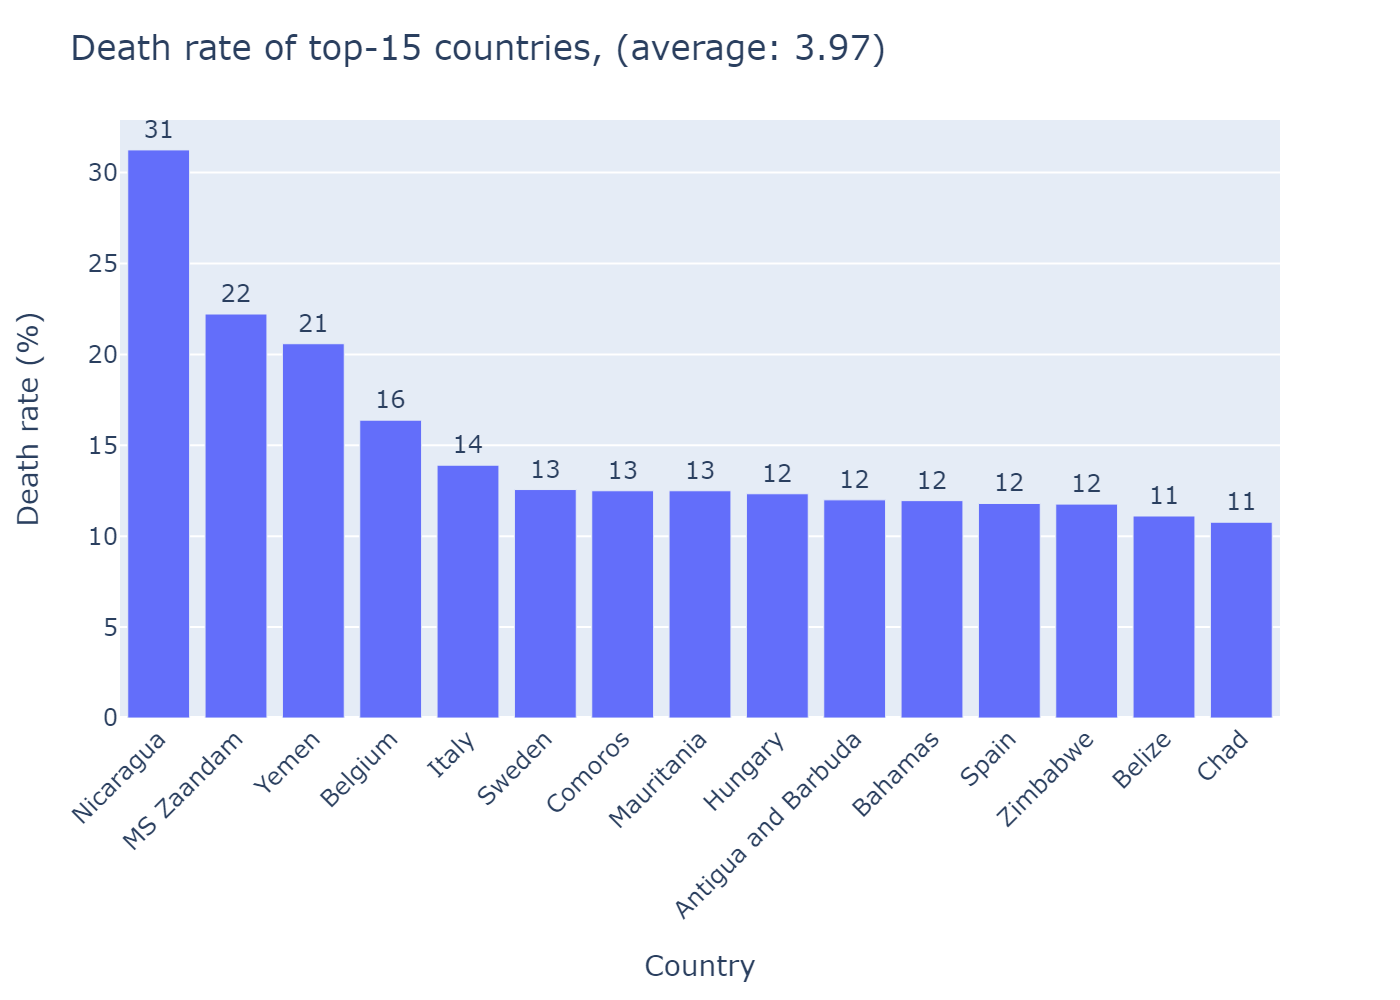

In [262]:
# Now let's see the top countries
ave_death_rate = global_death_rate_collapse_country[date_string[-1]].mean()
top_country = global_death_rate_collapse_country.nlargest(15, date_string[-1])
country_collapse_bottom = global_death_rate_collapse_country.copy()
country_collapse_bottom.loc[country_collapse_bottom[date_string[-1]] < top_country[date_string[-1]].min(),
                            'Country'] = 'Other countries'


# Bar chart
fig = px.bar(top_country, y=date_string[-1], x='Country', text=date_string[-1])

margin_size = 60
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(margin=dict(l=margin_size, r=margin_size, t=margin_size, b=margin_size))
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', 
                  title_text = "Death rate of top-15 countries, (average: " + str(round(ave_death_rate,2)) + ")")
fig.update_yaxes(title_text="Death rate (%)")
fig.update_xaxes(title_text="Country", tickangle=-45)

# Static plot (to show the figures on Github, I have to convert to static image)
# For interactive plot, use the interactive plot above
Image(pio.to_image(fig, format='png', scale=2))